<a href="https://colab.research.google.com/github/ninemoonz/dacon_titanic/blob/main/dacon_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# google drive mounting
from google.colab import drive
drive.mount("/gdrive/")

Mounted at /gdrive/


Data Loading

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

drive_path = "/gdrive/My Drive/"
train = pd.read_csv(drive_path + "titanic/train.csv")
test = pd.read_csv(drive_path + "titanic/test.csv")
submission = pd.read_csv(drive_path + "titanic/submission.csv")
print(train.shape, test.shape, submission.shape)


(891, 12) (418, 11) (418, 2)


In [5]:
# train datagrame
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
# test dataframe
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [7]:
# submission dataframe
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [8]:
# train dataframe information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# train dataframe stat info
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


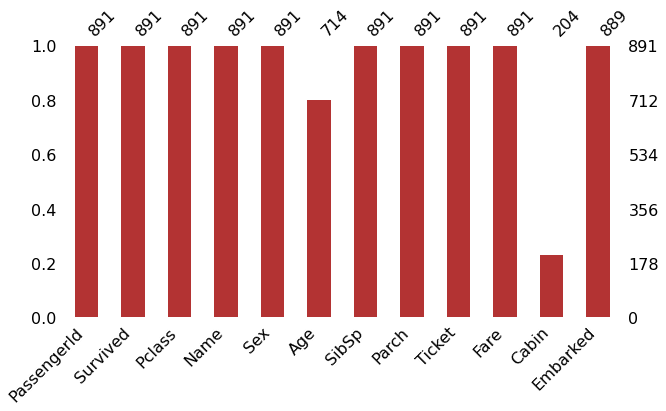

In [10]:
# Missing values

import missingno as msno
msno.bar(train, figsize=(10, 5), color=(0.7, 0.2, 0.2))
plt.show()

#we can see age, cabin and embarked columns have missing values

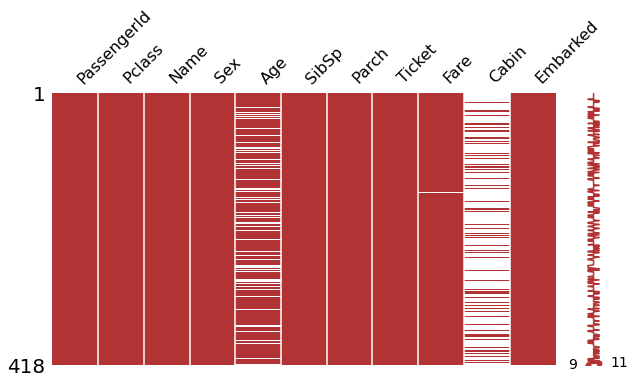

In [11]:
# matrix shows the place in the dataframe of missing values
msno.matrix(test, figsize=(10,5), color=(0.7, 0.2, 0.2))
plt.show()

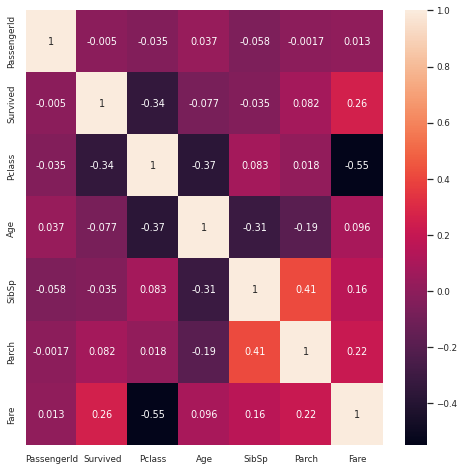

In [12]:
# Analyzing Correlation
plt.figure(figsize=(8, 8))
sns.set(font_scale=0.8)
sns.heatmap(train.corr(), annot=True, cbar=True)
plt.show()

In [13]:
# Data concatenation
train['TrainSplit'] = 'Train'
test['TrainSplit'] = 'Test'
data = pd.concat([train, test], axis=0)
print(data.shape)

(1309, 13)


In [14]:
# Data Pre-processing

# Age missing value -> mean
# Fare missing value -> most repeated value

data_num = data.loc[:, ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

# fillna missing values
data_num['Age'] = data_num['Age'].fillna(data_num['Age'].mean())
data_num['Fare'] = data_num['Fare'].fillna(data_num['Fare'].mode()[0])

selected_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

x_train = data_num.loc[data['TrainSplit']=='Train', selected_features]
y_train = data_num.loc[data['TrainSplit']=='Train', 'Survived']

x_test = data_num.loc[data['TrainSplit']=='Test', selected_features]

print("Train Dataset size: ", x_train.shape, y_train.shape)
print("Test dataset size: ", x_test.shape)

Train Dataset size:  (891, 5) (891,)
Test dataset size:  (418, 5)


# **Model Training and Accuracy Evaluation**

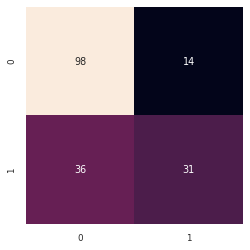

In [15]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.2, shuffle=True, random_state=20)

# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_tr, y_tr)
y_val_pred = lr_model.predict(x_val)

#Confusion Matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, cbar=False, square=True)
plt.show()

Precision = TP/(TP+FP)

Recall = TP/(TP+FN)

F1 score is average value of precision and recall values.

higher the F1 score better the prediction 

F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

print("Accuracy: %.4f"%accuracy_score(y_val, y_val_pred))
print("Precision: %.4f"%precision_score(y_val, y_val_pred))
print("Recall: %.4f"%recall_score(y_val, y_val_pred))

print("F1: %.4f"%f1_score(y_val, y_val_pred))
print("AUC: %.4f"%roc_auc_score(y_val, y_val_pred))

#AUC : Area Under Curve. Evaluation Standard Used in Dacon. Maximum value is 1, and better the prediction, closer to 1

Accuracy: 0.7207
Precision: 0.6889
Recall: 0.4627
F1: 0.5536
AUC: 0.6688


In [17]:
# Model Prediction using x_test data
y_test_pred = lr_model.predict(x_test)

submission['Survived'] = y_test_pred.astype(int)

submission_filepath = drive_path + 'baseline_num_lr_submission_001.csv'
submission.to_csv(submission_filepath, index=False)
submission.head(5)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


## Dacon leaderboard score Check


Feature Engineering

In [18]:
train['Survived'].value_counts(dropna=False)

0    549
1    342
Name: Survived, dtype: int64

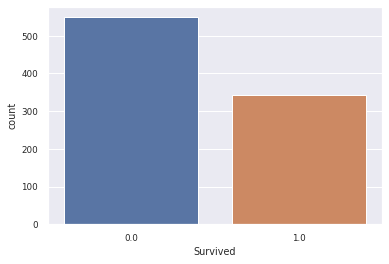

In [19]:
sns.countplot(x='Survived', data=data[data['TrainSplit']=='Train'])
plt.show()

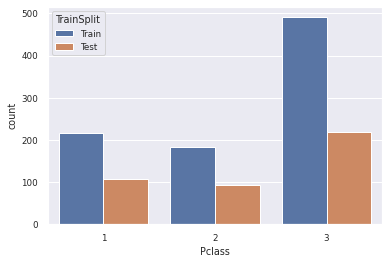

In [20]:
# Pclass
# train - test data dispersion
sns.countplot(x='Pclass', hue='TrainSplit', data=data)
plt.show()

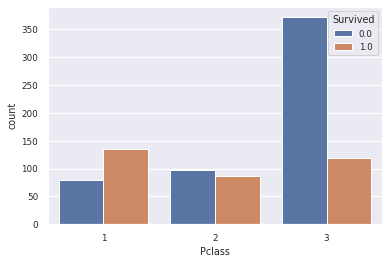

In [21]:
# Survived per Pclass
sns.countplot(x='Pclass', hue='Survived', data=data[data['TrainSplit']=='Train'])
plt.show()

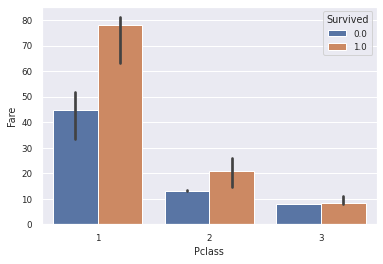

In [22]:
# median value of the fare of Pclass
sns.barplot(x='Pclass', y='Fare', hue='Survived', data=data[data['TrainSplit']=='Train'], estimator=np.median)
plt.show()

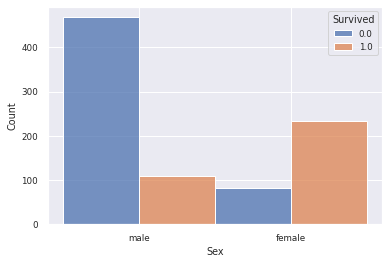

In [23]:
# survived comparing with gender
sns.histplot(x='Sex', hue='Survived', multiple='dodge', data=data[data['TrainSplit']=='Train'])
plt.show()

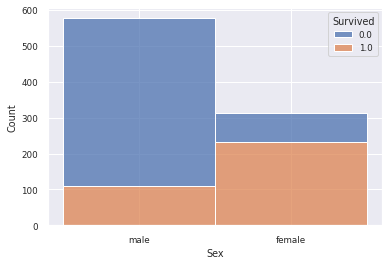

In [24]:
sns.histplot(x='Sex', hue='Survived', multiple='stack', data=data[data['TrainSplit']=='Train'])
plt.show()

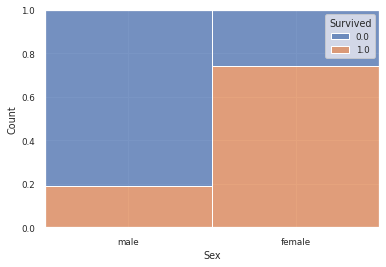

In [25]:
sns.histplot(x='Sex', hue='Survived', multiple='fill', data=data[data['TrainSplit']=='Train'])
plt.show()
#show the percentile

In [26]:
# label encoding female as 0, male as 1

data.loc[data['Sex']=='female', 'Sex'] = 0
data.loc[data['Sex']=='male', 'Sex'] = 1
data['Sex'] = data['Sex'].astype(int)

data['Sex'].value_counts(dropna=False)

1    843
0    466
Name: Sex, dtype: int64

In [27]:
# Name colums
# how to treat string data
data['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina', ..., 'Saether, Mr. Simon Sivertsen',
       'Ware, Mr. Frederick', 'Peter, Master. Michael J'], dtype=object)

In [28]:
title_name = data['Name'].str.split(",", expand=True)[1]
title_name

0                                  Mr. Owen Harris
1       Mrs. John Bradley (Florence Briggs Thayer)
2                                      Miss. Laina
3               Mrs. Jacques Heath (Lily May Peel)
4                                Mr. William Henry
                          ...                     
413                                      Mr. Woolf
414                                  Dona. Fermina
415                            Mr. Simon Sivertsen
416                                  Mr. Frederick
417                              Master. Michael J
Name: 1, Length: 1309, dtype: object

In [29]:
title = title_name.str.split(".", expand=True)[0]
title.value_counts(dropna=False)

 Mr              757
 Miss            260
 Mrs             197
 Master           61
 Rev               8
 Dr                8
 Col               4
 Mlle              2
 Major             2
 Ms                2
 Lady              1
 Sir               1
 Mme               1
 Don               1
 Capt              1
 the Countess      1
 Jonkheer          1
 Dona              1
Name: 0, dtype: int64

In [30]:
title = title.str.replace(r'Ms','Miss')
title = title.str.replace(r'Mlle|the Countess|Lady|Don|Dona|Mme|Sir|Jonkheer|Noblea','Noble')
title = title.str.replace(r'Col|Major|Capt','Officer')
title = title.str.replace(r'Dr|Rev','Priest')

data['Title'] = np.array(title)

data['Title'].value_counts(dropna=False)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


 Mr         757
 Miss       262
 Mrs        197
 Master      61
 Priest      16
 Noble        8
 Officer      7
 Noblea       1
Name: Title, dtype: int64

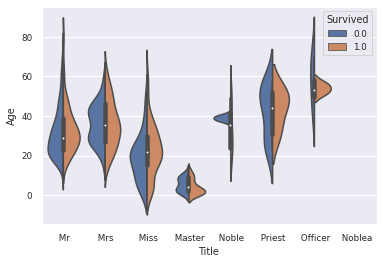

In [31]:
sns.violinplot(x='Title', y='Age', hue='Survived', data=data, split=True)
plt.show()

In [32]:
data = data.drop('Name', axis=1)
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'TrainSplit', 'Title'],
      dtype='object')

In [33]:
# Age
for title in data['Title'].unique():
  #number of missing values
  print("%s size of missing value:"%title, data.loc[data['Title']==title,'Age'].isnull().sum())
  # median value of each Title
  age_med = data.loc[data['Title']==title, 'Age'].median()
  data.loc[data['Title']==title,'Age'] = data.loc[data['Title']==title, 'Age'].fillna(age_med)

print("\n")
print("Age column NaN size: ", data['Age'].isnull().sum())

 Mr size of missing value: 176
 Mrs size of missing value: 27
 Miss size of missing value: 51
 Master size of missing value: 8
 Noble size of missing value: 0
 Priest size of missing value: 1
 Officer size of missing value: 0
 Noblea size of missing value: 0


Age column NaN size:  0


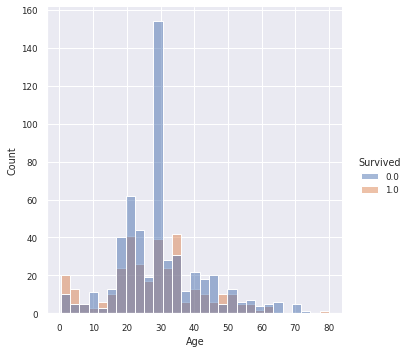

In [34]:
# Age dispersion
sns.displot(x='Age', kind='hist', hue='Survived', data=data[data['TrainSplit']=='Train'])
plt.show()

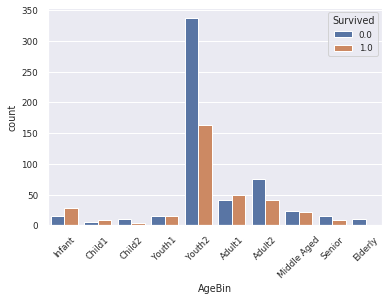

In [35]:
# Binning

bins = [0, 4, 8, 12, 16, 32, 36, 48, 56, 64, 100] 
labels = ['Infant', 'Child1', 'Child2', 'Youth1', 'Youth2', 'Adult1', 'Adult2', 'Middle Aged', 'Senior', 'Elderly']
data['AgeBin']=pd.cut(data['Age'], bins=bins, labels=labels)
# 0~4 = Infant
# 4~8 = Child1
# ...


#Age_bin(age term)에 따른 생존율 비교
sns.countplot(x='AgeBin', hue='Survived', data=data[data['TrainSplit']=='Train'])

plt.xticks(rotation=45)
plt.show()


## SibSp

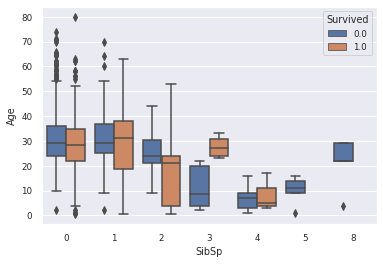

In [36]:
sns.boxplot(x='SibSp', y='Age', hue='Survived', data=data[data['TrainSplit']=='Train'])
plt.show()

## Parch

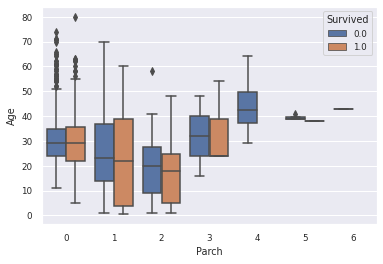

In [37]:
## Parents and childrens
sns.boxplot(x='Parch', y='Age', hue='Survived', data=data[data['TrainSplit']=='Train'])
plt.show()

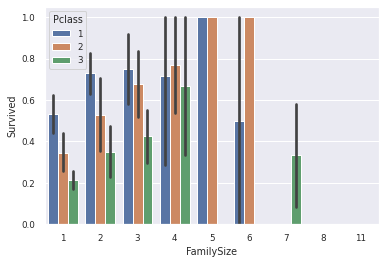

In [38]:
# 가족 구성원의 수
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

# 가족 구성원의 수와 생존율 관계
sns.barplot(x='FamilySize', y='Survived', hue='Pclass', estimator=np.mean, data=data[data['TrainSplit']=='Train'])
plt.show()

## Fare

In [39]:
# 결측값 확인
data.loc[data['Fare'].isnull(), :]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TrainSplit,Title,AgeBin,FamilySize
152,1044,NaN,3,1,60.5,0,0,3701,NaN,NaN,S,Test,Mr,Senior,1


In [40]:
# 3등석 요금의 평균값을 가지고 결측값 대체
p3_fare_mean = data.loc[data['Pclass']==3, 'Fare'].mean()
print(p3_fare_mean)
data['Fare']=data['Fare'].fillna(p3_fare_mean)
data.loc[data['PassengerId']==1044, :'Fare']

13.302888700564969


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
152,1044,NaN,3,1,60.5,0,0,3701,13.302889


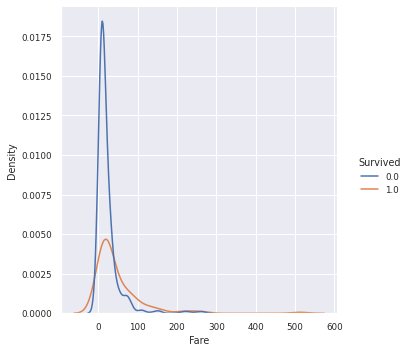

In [41]:
sns.displot(x='Fare', kind='kde', hue='Survived', data=data[data['TrainSplit']=='Train'])
plt.show()

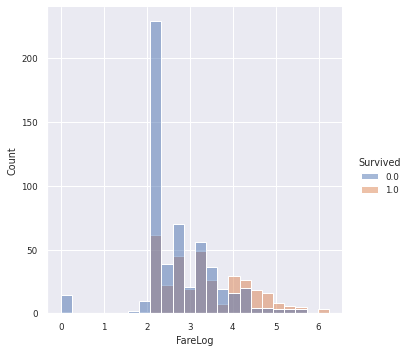

In [42]:
# log
data['FareLog'] = np.log1p(data['Fare'])

# FareLog Dispersion
sns.displot(x='FareLog', kind='hist', hue='Survived', data=data[data['TrainSplit']=='Train'])
plt.show()

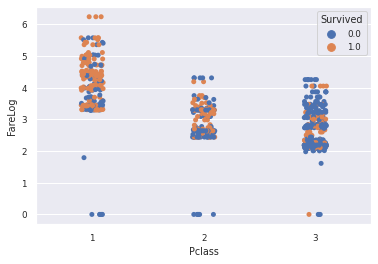

In [43]:
# stripplot

sns.stripplot(x='Pclass', y='FareLog', hue='Survived', data=data[data['TrainSplit']=='Train'])
plt.show()

## Embarked: 탑승 항구

In [44]:
data.loc[data['Embarked'].isnull(), :]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TrainSplit,Title,AgeBin,FamilySize,FareLog
61,62,1.0,1,0,38.0,0,0,113572,80.0,B28,NaN,Train,Miss,Adult2,1,4.394449
829,830,1.0,1,0,62.0,0,0,113572,80.0,B28,NaN,Train,Mrs,Senior,1,4.394449


In [46]:
# so we fill the NaN value of Embarked with most embarked port 'S' value
print("Most repeated Embarked value: ", data['Embarked'].mode()[0])
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data['Embarked'].value_counts(dropna=False)

Most repeated Embarked value:  S


S    916
C    270
Q    123
Name: Embarked, dtype: int64

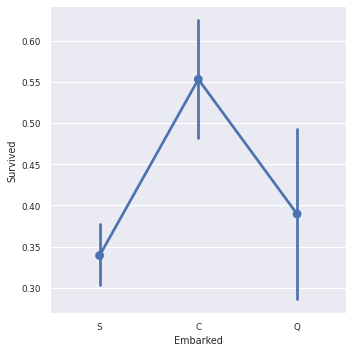

In [47]:
#seaborn 'catplot' function. 'kind' option
sns.catplot(x='Embarked', y='Survived', kind='point', data=data[data['TrainSplit']=='Train'])
plt.show()

## Cabin

In [48]:
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [49]:
data['Cabin'].str.slice(0, 1).value_counts(dropna=False)

NaN    1014
C        94
B        65
D        46
E        41
A        22
F        21
G         5
T         1
Name: Cabin, dtype: int64

When the missing value is too many like the above,
Usually the whole row is ommited for the model learning.
However we will remain the data for now to see whether the NaN values has meanings

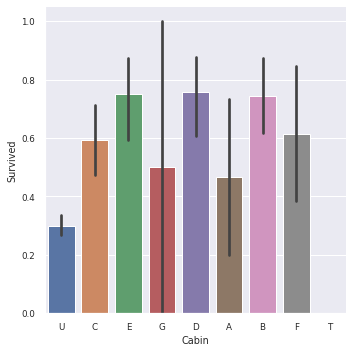

In [50]:
# changing NaN -> U
data['Cabin'] = data['Cabin'].str.slice(0, 1)
data['Cabin'] = data['Cabin'].fillna('U')

# Cabin survival rate comparison
sns.catplot(x='Cabin', y='Survived', kind='bar', data=data[data['TrainSplit']=='Train'])
plt.show()

## Ticket

In [51]:
data['Ticket'].value_counts(dropna=False)

CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: Ticket, Length: 929, dtype: int64

In [52]:
# extracting alphabet from ticket number
data['Ticket'] = data['Ticket'].str.replace(".","").str.replace("/","")
data['Ticket'] = data['Ticket'].str.strip().str.split(' ').str[0]
data['Ticket'].value_counts(dropna=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


PC         92
CA         68
A5         28
SOTONOQ    24
WC         15
           ..
239854      1
4134        1
11771       1
65304       1
359309      1
Name: Ticket, Length: 741, dtype: int64

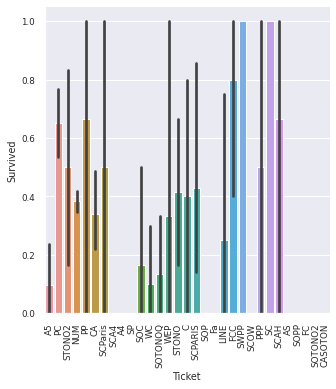

In [53]:
# changing the value to NUM if it's only number value
data.loc[data['Ticket'].str.isdigit(), 'Ticket']='NUM'
data['Ticket'].value_counts(dropna=False)[:10]

# Survivality based on ticket number
sns.catplot(x='Ticket', y='Survived', kind='bar', data=data[data['TrainSplit']=='Train'])

plt.xticks(rotation=90)
plt.show()

# Data Pre-Processing

In [55]:
# label Encoding
# str data 'Title', 'AgeBin' to int label
from sklearn.preprocessing import LabelEncoder
for col in ['Title', 'AgeBin']:
  encoder = LabelEncoder()
  data[col] = encoder.fit_transform(data[col])

data.loc[:, ['Title', 'AgeBin']].head()


,Title,AgeBin
0,2,9
1,3,1
2,1,9
3,3,0
4,2,0


## One hot encoding

In [56]:
onehot_prefix=[]
for col in ['Embarked', 'Cabin', 'Ticket']:
  data[col] = data[col].astype('category')
  data = pd.get_dummies(data, columns = [col], prefix=col[:3], drop_first=True)
  onehot_prefix.append(col[:3])

data.loc[:,[col for col in data.columns if col[:3] in onehot_prefix]].head()

,Emb_Q,Emb_S,Cab_B,Cab_C,Cab_D,Cab_E,Cab_F,Cab_G,Cab_T,Cab_U,...,Tic_SOPP,Tic_SOTONO2,Tic_SOTONOQ,Tic_SP,Tic_STONO,Tic_STONO2,Tic_STONOQ,Tic_SWPP,Tic_WC,Tic_WEP
0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Feature Scaling

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

scaled_cols = [col for col in data.loc[:, 'Pclass':].columns if col!='TrainSplit']

data_scaled = data.loc[:, scaled_cols]
data_scaled = scaler.fit_transform(data_scaled)

data.loc[:, scaled_cols] = data_scaled[:, :]
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,TrainSplit,Title,...,Tic_SOPP,Tic_SOTONO2,Tic_SOTONOQ,Tic_SP,Tic_STONO,Tic_STONO2,Tic_STONOQ,Tic_SWPP,Tic_WC,Tic_WEP
0,1,0.0,1.0,1.0,0.273456,0.125,0.0,0.014151,Train,0.285714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1.0,0.0,0.0,0.473882,0.125,0.0,0.139136,Train,0.428571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1.0,1.0,0.0,0.323563,0.000,0.0,0.015469,Train,0.142857,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,1.0,0.0,0.0,0.436302,0.125,0.0,0.103644,Train,0.428571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,1.0,1.0,0.436302,0.000,0.0,0.015713,Train,0.285714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model Learning

In [64]:
selected_features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Title', 'AgeBin', 'FamilySize', 'FareLog', 
                     'Emb_Q', 'Emb_S', 'Cab_B', 'Cab_C', 'Cab_D', 'Cab_E', 'Cab_F', 'Cab_G', 'Cab_T', 'Cab_U', 
                     'Tic_A4', 'Tic_A5', 'Tic_AQ3', 'Tic_AQ4', 'Tic_AS', 'Tic_C', 'Tic_CA', 'Tic_CASOTON', 'Tic_FC', 'Tic_FCC', 'Tic_Fa', 'Tic_LINE', 'Tic_LP', 'Tic_NUM', 'Tic_PC','Tic_PP', 'Tic_PPP', 'Tic_SC', 'Tic_SCA3', 'Tic_SCA4', 'Tic_SCAH',
                     'Tic_SCOW', 'Tic_SCPARIS', 'Tic_SCParis', 'Tic_SOC', 'Tic_SOP', 'Tic_SOPP', 'Tic_SOTONO2', 'Tic_SOTONOQ', 'Tic_SP', 'Tic_STONO', 'Tic_STONO2', 'Tic_STONOQ', 'Tic_SWPP', 'Tic_WC', 'Tic_WEP']

len(selected_features)

54

In [65]:
y_train = data.loc[data['TrainSplit']=='Train', 'Survived']
x_train = data.loc[data['TrainSplit']=='Train', selected_features]
x_test = data.loc[data['TrainSplit']=='Test', selected_features]

print("Train Dataset size: ", x_train.shape, y_train.shape)
print("Test Dataset size: ", x_test.shape)

Train Dataset size:  (891, 54) (891,)
Test Dataset size:  (418, 54)


In [66]:
# training 
from sklearn.model_selection import train_test_split

x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.2, shuffle=True, random_state=20)
print("Train dataset size: ", x_tr.shape, y_tr.shape)
print("Eval dataset size: ", x_val.shape, y_val.shape)

Train dataset size:  (712, 54) (712,)
Eval dataset size:  (179, 54) (179,)


In [67]:
# logistic regression model
lr_model = LogisticRegression()
lr_model.fit(x_tr, y_tr)

y_tr_pred = lr_model.predict(x_tr)
print("Training Accuracy: %.4f"%accuracy_score(y_tr, y_tr_pred))
print("Training AUC: %.4f"%roc_auc_score(y_tr, y_tr_pred))

y_val_pred = lr_model.predict(x_val)
print("Eval Accuracy: %.4f"%accuracy_score(y_val, y_val_pred))
print("Eval AUC: %.4f"%roc_auc_score(y_val, y_val_pred))

Training Accuracy: 0.7963
Training AUC: 0.7829
Eval Accuracy: 0.8324
Eval AUC: 0.8031


# Second Submission

In [70]:
# Test data prediction and summit
y_test_pred = lr_model.predict(x_test)
submission['Survived'] = y_test_pred.astype(int)
submission_filepath = drive_path + 'baseline_lr_submission_002.csv'
submission.to_csv(submission_filepath, index=False)

### Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=20)

#cross_val_score function
from sklearn.model_selection import cross_val_score
auc_scores = cross_val_score(lr_model, x_train, y_train, cv=5, scoring='roc_auc')
print("AUC score of Each Fold", np.round(auc_scores, 4))
print("Average AUC score: ", np.round(np.mean(auc_scores), 4))


AUC score of Each Fold [0.8351 0.8166 0.8793 0.8533 0.8703]
Average AUC score:  0.8509


In [73]:
# Summit file
rf_model.fit(x_train, y_train)
y_test_pred = rf_model.predict(x_test)
submission['Survived'] = y_test_pred.astype(int)
submission_filepath = drive_path + 'baseline_rf_submission_003.csv'
submission.to_csv(submission_filepath, index=False)

## Importance of Feature

In [74]:
def plot_importance(model, features):
  importances = model.feature_importances_
  indices = np.argsort(importances)
  feature_names = [features[i] for i in indices]
  feature_imp = importances[indices]

  plt.figure(figsize=(10, 12))
  plt.title('Feature Importances')
  plt.barh(range(len(indices)),feature_imp, align='center')
  plt.yticks(range(len(indices)), feature_names)
  plt.xlabel('Relative Importance')

  print("Feature: ", list(reversed(feature_names)))
  print("Importance: ", list(reversed(feature_imp)))

  return list(reversed(feature_names)), list(reversed(feature_imp))

Feature:  ['FareLog', 'Sex', 'Title', 'AgeBin', 'Pclass', 'FamilySize', 'SibSp', 'Cab_U', 'Parch', 'Emb_S', 'Tic_NUM', 'Cab_E', 'Tic_PC', 'Cab_D', 'Emb_Q', 'Cab_C', 'Cab_B', 'Tic_SWPP', 'Tic_STONO', 'Tic_CA', 'Tic_WC', 'Tic_A5', 'Cab_F', 'Tic_SOTONOQ', 'Tic_STONO2', 'Tic_C', 'Cab_G', 'Tic_SCPARIS', 'Tic_SOPP', 'Tic_WEP', 'Tic_FCC', 'Tic_SOC', 'Tic_LINE', 'Tic_SCParis', 'Tic_PP', 'Tic_SCAH', 'Tic_A4', 'Tic_FC', 'Cab_T', 'Tic_PPP', 'Tic_CASOTON', 'Tic_SC', 'Tic_SOTONO2', 'Tic_SCOW', 'Tic_AS', 'Tic_SOP', 'Tic_SCA4', 'Tic_SP', 'Tic_Fa', 'Tic_LP', 'Tic_SCA3', 'Tic_AQ3', 'Tic_AQ4', 'Tic_STONOQ']
Importance:  [0.23169442201124152, 0.18100460681851027, 0.1282576455507815, 0.08617291489183745, 0.06225507780335222, 0.05975935310068708, 0.038319466675176654, 0.03342221980030414, 0.02842838944270575, 0.023365367396596178, 0.015720742752487544, 0.012457129829619952, 0.010503911825181341, 0.010357417008661513, 0.01028412303198695, 0.008970257141290563, 0.008749526540276576, 0.005974865225658449, 0.0

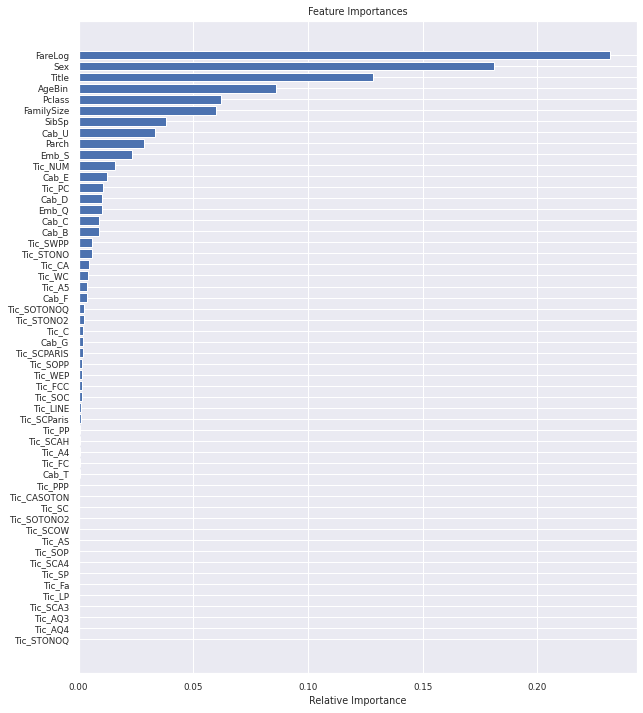

In [75]:
# Random Forest model Feature Importance
imp_features, imp_scores = plot_importance(rf_model, selected_features)

In [76]:
# top 10 features
selected_features = imp_features[:10]
y_train = data.loc[data['TrainSplit']=='Train', 'Survived']
x_train = data.loc[data['TrainSplit']=='Train', selected_features]
x_test = data.loc[data['TrainSplit']=='Test', selected_features]
print("Train dataset size: ", x_train.shape, y_train.shape)
print("Test dataset size: ", x_test.shape)

Train dataset size:  (891, 10) (891,)
Test dataset size:  (418, 10)


In [77]:
# Doing Random Forest Classifier with the 10 features
rf_model = RandomForestClassifier(random_state=2020)
auc_scores = cross_val_score(rf_model, x_train, y_train, cv=5, scoring='roc_auc')
print("AUC score of each fold: ", np.round(auc_scores, 4))
print("Average AUC score: ", np.round(np.mean(auc_scores), 4))

rf_model.fit(x_train, y_train)
y_test_pred = rf_model.predict(x_test)
submission['Survived'] = y_test_pred.astype(int)
submission_filepath = drive_path + 'baseline_rf_submission_004.csv'
submission.to_csv(submission_filepath, index=False)

AUC score of each fold:  [0.8678 0.8084 0.9028 0.843  0.8849]
Average AUC score:  0.8614


### XGBoost Model

In [79]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth=3, random_state=2020)
auc_scores = cross_val_score(xgb_model, x_train, y_train, cv=3, scoring='roc_auc')
print("AUC score of each fold: ", np.round(auc_scores, 4))
print("Average AUC score: ", np.round(np.mean(auc_scores), 4))

xgb_model.fit(x_train, y_train)
y_test_pred = xgb_model.predict(x_test)
submission['Survived'] = y_test_pred.astype(int)
submission_filepath = drive_path + 'baseline_xgb_submission_005.csv'
submission.to_csv(submission_filepath, index=False)

AUC score of each fold:  [0.834  0.8867 0.9072]
Average AUC score:  0.876


## Probability Prediction

In [80]:
y_xgb_proba = xgb_model.predict_proba(x_test)[:, 1]
y_rf_proba = rf_model.predict_proba(x_test)[:, 1]

# Ensemble 
y_proba = (y_xgb_proba + y_rf_proba)/2
submission['Survived'] = y_proba
submission_filepath = drive_path + 'baseline_proba_submission_001.csv'
submission.to_csv(submission_filepath, index=False)